<a href="https://colab.research.google.com/github/abdulloshoh/DataScience_mohirdev/blob/master/Amaliyot_CUSTOMER_CHURN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import  accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
url="https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"

df = pd.read_excel(url, sheet_name="E Comm")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
description = pd.read_excel(url, sheet_name="Data Dict", header=1, usecols=[1,2,3])
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [4]:
df.shape

(5630, 20)

In [5]:
churn_rate = df['Churn'].value_counts()/len(df)*100
churn_rate

0    83.161634
1    16.838366
Name: Churn, dtype: float64

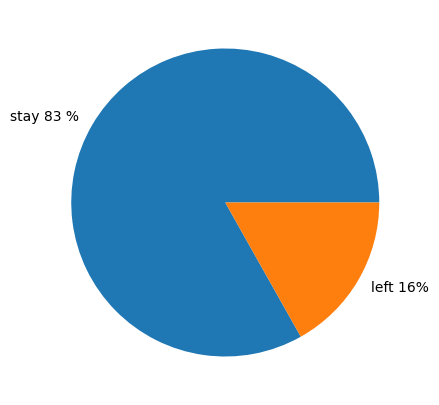

In [6]:
plt.figure(figsize=(10,5))
plt.pie(churn_rate , labels=['stay 83 %','left 16%'])
plt.show()

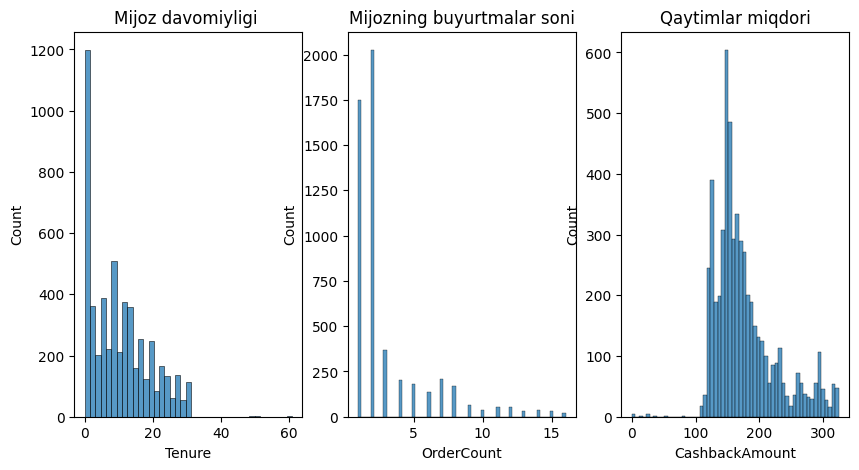

In [7]:
fig , axes = plt.subplots(1,3, figsize=(10,5))


sb.histplot(x='Tenure', data=df, ax=axes[0])
axes[0].set_title('Mijoz davomiyligi ')

sb.histplot(x='OrderCount', data=df, ax=axes[1])
axes[1].set_title('Mijozning buyurtmalar soni')

sb.histplot(x='CashbackAmount', data=df, ax=axes[2])
axes[2].set_title('Qaytimlar miqdori')

plt.show()




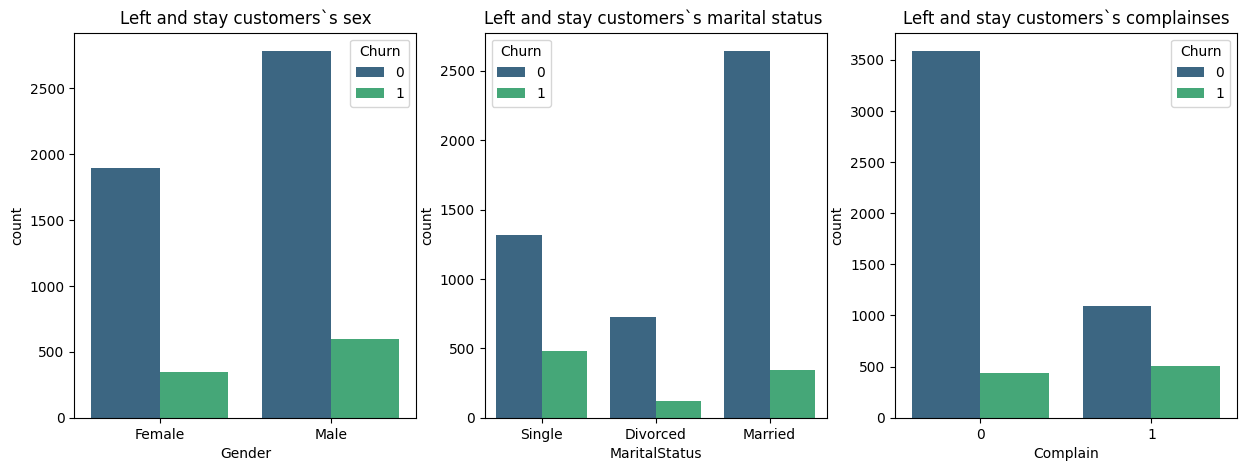

In [8]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sb.countplot(x='Gender' ,hue='Churn',palette='viridis', data=df, ax=axes[0])
axes[0].set_title('Left and stay customers`s sex')

sb.countplot(x='MaritalStatus',hue='Churn',palette='viridis', data=df, ax=axes[1])
axes[1].set_title('Left and stay customers`s marital status ')

sb.countplot(x='Complain', hue='Churn',palette='viridis', data=df, ax=axes[2])
axes[2].set_title('Left and stay customers`s complainses')


plt.show()


In [9]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

<ipython-input-9-b361e99cad45>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Churn']).abs().sort_values(ascending=False)


Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

In [10]:
print(f'not exsit datas : {df.isnull().sum().sum()}')

missing_rows = df[df.isnull().any(axis=1)].shape[0]

print(f'not exsist rows : {missing_rows} ')

print(f'not exsist rows % : {np.round(missing_rows/len(df)*100)}%')



not exsit datas : 1856
not exsist rows : 1856 
not exsist rows % : 33.0%


In [11]:
data = df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus','Gender']] # we collected only  higer columns

print(f'not exsit datas : {data.isnull().sum().sum()}')

missing_rows = data[data.isnull().any(axis=1)].shape[0]

print(f'not exsist rows : {missing_rows} ')

print(f'not exsist rows % : {np.round(missing_rows/len(df)*100)}%')

# and now we have , not exsist datas not 33% but 10 % it helps us to ML

not exsit datas : 571
not exsist rows : 571 
not exsist rows % : 10.0%


In [12]:
data = data.dropna()  # we dropped not exsist datas , it has 10%
data.shape

(5059, 7)

In [13]:
data['Churn'].value_counts()/len(data)

0    0.839296
1    0.160704
Name: Churn, dtype: float64

In [14]:
data.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus,Gender
0,1,4.0,1,5.0,159.93,Single,Female
3,1,0.0,0,3.0,134.07,Single,Male
4,1,0.0,0,3.0,129.60,Single,Male
5,1,0.0,1,7.0,139.19,Single,Female
8,1,13.0,1,2.0,126.83,Divorced,Male


In [15]:
encoded = pd.get_dummies(data) # str to int
encoded.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
0,1,4.0,1,5.0,159.93,0,0,1,1,0
3,1,0.0,0,3.0,134.07,0,0,1,0,1
4,1,0.0,0,3.0,129.60,0,0,1,0,1
5,1,0.0,1,7.0,139.19,0,0,1,1,0
8,1,13.0,1,2.0,126.83,1,0,0,0,1


In [16]:
x = encoded.drop('Churn',axis=1) # split to x and y for ML
y = encoded['Churn']

In [17]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [18]:
x_train , x_test , y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify=y, random_state=0) # stratify - tabaqalash

In [19]:
LR_model = LogisticRegression()  # lets try to use linearregression model
LR_model.fit(x_train, y_train)

LogisticRegression()

In [22]:
y_predict = LR_model.predict(x_test)
print(metrics.classification_report(y_test , y_predict))
print('Accuricy Model ', metrics.accuracy_score(y_test, y_predict)) # Accuricy Model  0.8794466403162056

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       849
           1       0.75      0.38      0.50       163

    accuracy                           0.88      1012
   macro avg       0.82      0.68      0.72      1012
weighted avg       0.87      0.88      0.86      1012

Accuricy Model  0.8794466403162056


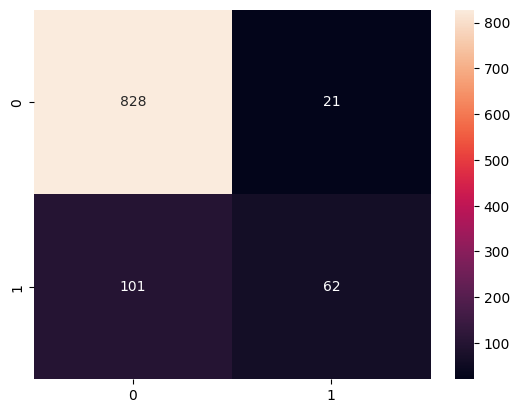

In [23]:
confus = metrics.confusion_matrix(y_test , y_predict)
sb.heatmap(confus, annot=True, fmt='g')
plt.show()


In [24]:
metrics.confusion_matrix(y_test , y_predict) # 101, 62 it is not good result from model work

array([[828,  21],
       [101,  62]])

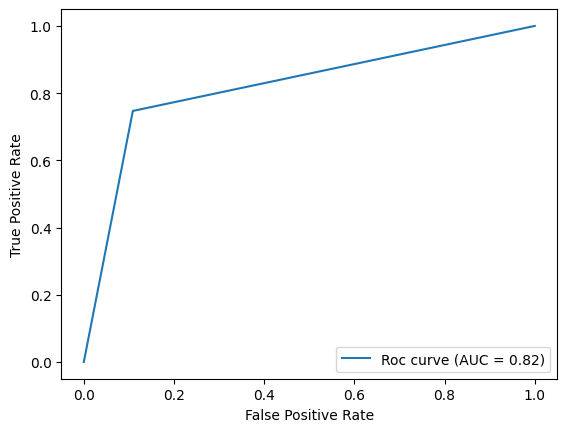

In [27]:
fpr , tpr, thresholds = metrics.roc_curve(y_predict, y_test)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()



In [29]:
svc = SVC() # lets try with Support Vector Machines  model

In [31]:
svc.fit(x_train, y_train)

SVC()

In [32]:
y_pred = svc.predict(x_test)

In [33]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       849
           1       0.67      0.31      0.42       163

    accuracy                           0.86      1012
   macro avg       0.77      0.64      0.67      1012
weighted avg       0.85      0.86      0.84      1012



In [37]:
print("accuracy score:", accuracy_score(y_test , y_pred))

accuracy score: 0.8636363636363636


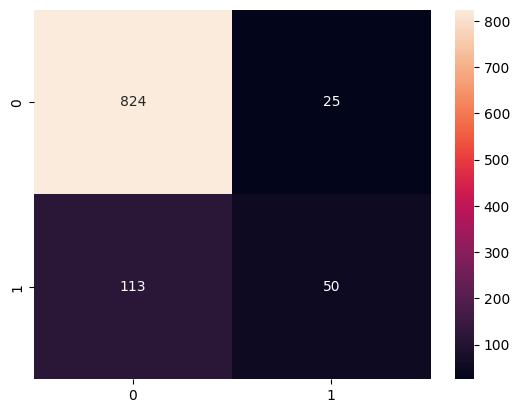

In [42]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(conf_mat, annot=True,fmt="g")
plt.show()


In [45]:
metrics.confusion_matrix(y_test, y_pred) # 113,  50 it is

array([[824,  25],
       [113,  50]])

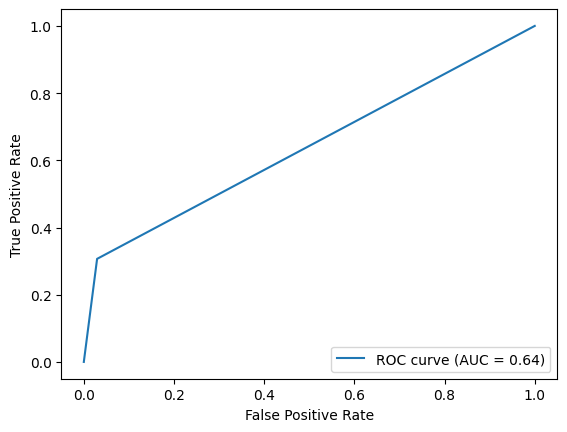

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [ ]:
# SVC results : 113,  50 it is not good result too

In [47]:
tree = DecisionTreeClassifier()
tree.fit(x_train , y_train)

DecisionTreeClassifier()

In [48]:
y_pr = tree.predict(x_test)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       849
           1       0.85      0.90      0.88       163

    accuracy                           0.96      1012
   macro avg       0.92      0.94      0.93      1012
weighted avg       0.96      0.96      0.96      1012

Model aniqligi: 0.9594861660079052


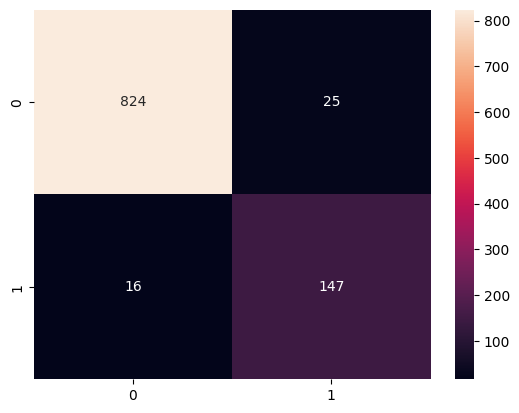

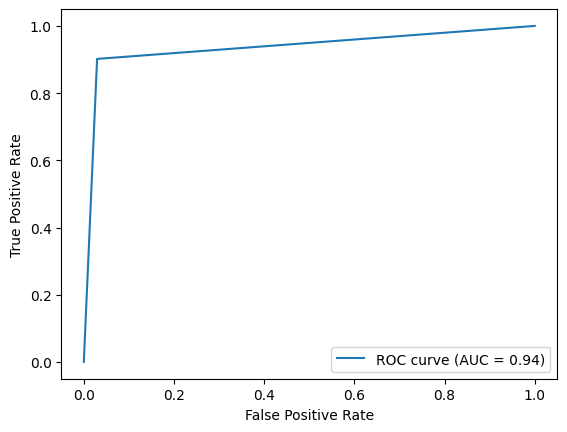

In [57]:

tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()








In [ ]:
# Decissiontree model is so good worked .